In [1]:
from sklearn.neural_network import MLPClassifier
from scipy.io import arff
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn import metrics 
from sklearn.tree import _tree
import matplotlib.pyplot as plt
import dataframe_image as dfi
from keras import Sequential
from keras.layers import Dense
from keras import layers


In [3]:
df = pd.read_csv("../datasets/chess.data", sep=",")
print(" \nCount total NaN at each column in a DataFrame : \n\n",
      df.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 white_king_file    0
white_king_rank    0
white_rook_file    0
white_rook_rank    0
black_king_file    0
black_king_rank    0
result             0
dtype: int64


In [4]:
df["result"].value_counts()

fourteen    4553
thirteen    4194
twelve      3597
eleven      2854
draw        2796
fifteen     2166
ten         1985
nine        1712
eight       1433
seven        683
six          592
five         471
sixteen      390
two          246
four         198
three         81
one           78
zero          27
Name: result, dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("../datasets/chess.data", sep=",")



lbl_white_king=LabelEncoder()
df['white_king_file']=lbl_white_king.fit_transform(df['white_king_file'])
lbl_white_rook=LabelEncoder()
df['white_rook_file']=lbl_white_rook.fit_transform(df['white_rook_file'])
lbl_black_king=LabelEncoder()
df['black_king_file']=lbl_black_king.fit_transform(df['black_king_file'])
lbl_result=LabelEncoder()
df['result']=lbl_result.fit_transform(df['result'])


train = df.sample(frac=0.7, random_state=100) #random state is a seed value
test  = df.drop(train.index)

train_x = train.iloc[0::,0:6].copy()
train_y = train.iloc[0::,6:7].copy()


test_x = test.iloc[0::,0:6].copy()
test_y = test.iloc[0::,6:7].copy()

df.describe()
dfi.export(df.describe(), "questão2-estatisticas.png")


In [6]:
from tensorflow.keras.utils import to_categorical

# codificação categórica:
trn_Y = to_categorical(train_y)
tst_Y = to_categorical(test_y)

In [7]:

model = Sequential()

model.add(layers.Dense(150, activation='sigmoid', input_dim=len(df.columns)-1))
model.add(layers.Dense(80, activation='softmax'))
model.add(layers.Dense(18, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_x, trn_Y, batch_size=128, epochs=1000, verbose=True, 
    validation_data=(test_x, tst_Y)
).history
epochs = range(1, len(history['loss']) + 1)

Epoch 1/1000
154/154 [==============================] - 1s 3ms/step - loss: 2.7254 - accuracy: 0.1413 - val_loss: 2.6352 - val_accuracy: 0.1521
Epoch 2/1000
154/154 [==============================] - 0s 1ms/step - loss: 2.5830 - accuracy: 0.1436 - val_loss: 2.5354 - val_accuracy: 0.1384
Epoch 3/1000
154/154 [==============================] - 0s 1ms/step - loss: 2.4961 - accuracy: 0.1401 - val_loss: 2.4512 - val_accuracy: 0.1402
Epoch 4/1000
154/154 [==============================] - 0s 2ms/step - loss: 2.4190 - accuracy: 0.1399 - val_loss: 2.3852 - val_accuracy: 0.1386
Epoch 5/1000
154/154 [==============================] - 0s 2ms/step - loss: 2.3641 - accuracy: 0.1447 - val_loss: 2.3443 - val_accuracy: 0.1675
Epoch 6/1000
154/154 [==============================] - 0s 2ms/step - loss: 2.3262 - accuracy: 0.1864 - val_loss: 2.3109 - val_accuracy: 0.2049
Epoch 7/1000
154/154 [==============================] - 0s 2ms/step - loss: 2.2973 - accuracy: 0.2051 - val_loss: 2.2847 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


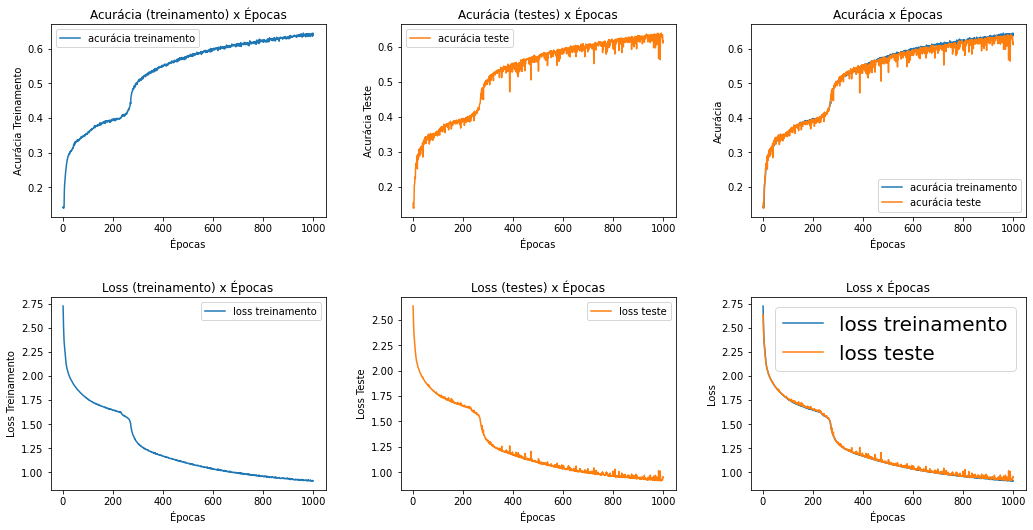

In [35]:
print(history.keys())
import numpy as np
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

axes[0][0].plot(epochs, history['accuracy'], color='C0', label='acurácia treinamento')
axes[0][1].plot(epochs, history['val_accuracy'], color='C1', label='acurácia teste')


axes[0][2].plot(epochs, history['accuracy'], color='C0', label='acurácia treinamento')
axes[0][2].plot(epochs, history['val_accuracy'], color='C1', label='acurácia teste')

axes[1][0].plot(epochs, history['loss'], color='C0', label='loss treinamento')
axes[1][1].plot(epochs, history['val_loss'], color='C1', label='loss teste')

axes[1][2].plot(epochs, history['loss'], color='C0', label='loss treinamento')
axes[1][2].plot(epochs, history['val_loss'], color='C1', label='loss teste')


axes[0][0].legend()
axes[0][1].legend()
axes[0][2].legend()

axes[0][0].title.set_text('Acurácia (treinamento) x Épocas')
axes[0][1].title.set_text('Acurácia (testes) x Épocas')
axes[0][2].title.set_text('Acurácia x Épocas')


axes[0][0].set_ylabel('Acurácia Treinamento')
axes[0][0].set_xlabel('Épocas')

axes[0][1].set_ylabel('Acurácia Teste')
axes[0][1].set_xlabel('Épocas')

axes[0][2].set_ylabel('Acurácia')
axes[0][2].set_xlabel('Épocas')


axes[1][0].legend()
axes[1][1].legend()
axes[1][2].legend()
axes[1][0].title.set_text('Loss (treinamento) x Épocas')
axes[1][1].title.set_text('Loss (testes) x Épocas')
axes[1][2].title.set_text('Loss x Épocas')
axes[1][0].set_ylabel('Loss Treinamento')
axes[1][0].set_xlabel('Épocas')
axes[1][1].set_ylabel('Loss Teste')
axes[1][1].set_xlabel('Épocas')
axes[1][2].set_ylabel('Loss')
axes[1][2].set_xlabel('Épocas')





fig.tight_layout(pad=3)
plt.legend(fontsize=20)
plt.show()

fig.savefig('questão2-result.png')
